In [1]:
! pip install yellowbrick
! pip install Kmodes

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install folium



You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
from kmodes.kmodes import KModes
from yellowbrick.cluster import KElbowVisualizer
import folium
import matplotlib.pyplot as plt
import scipy
import seaborn as sns



In [4]:
df = pd.read_csv("CybercrimeProfile.csv")
df.shape
df.head()
df.dtypes

Technical Knowledge       object
Personal traits           object
Social Characteristics    object
Motivating Factors        object
dtype: object

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 143.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 137.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 129.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 122.0


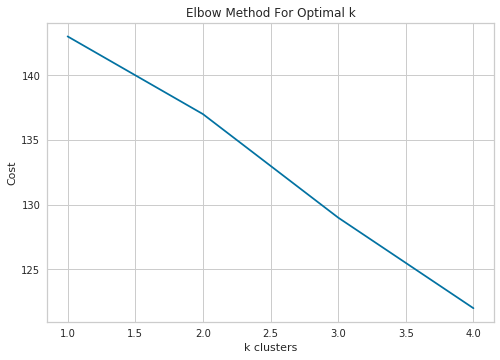

In [5]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [6]:
# taking optimal clusters as 3
km = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
cluster_labels = km.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 129.0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


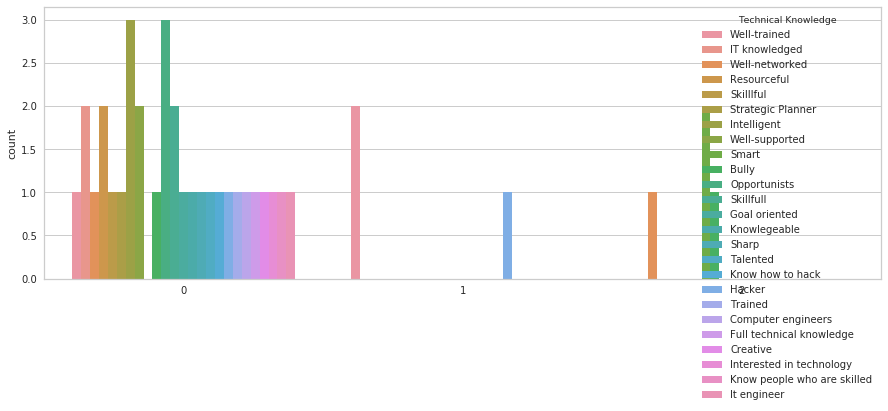

<Figure size 576x396 with 0 Axes>

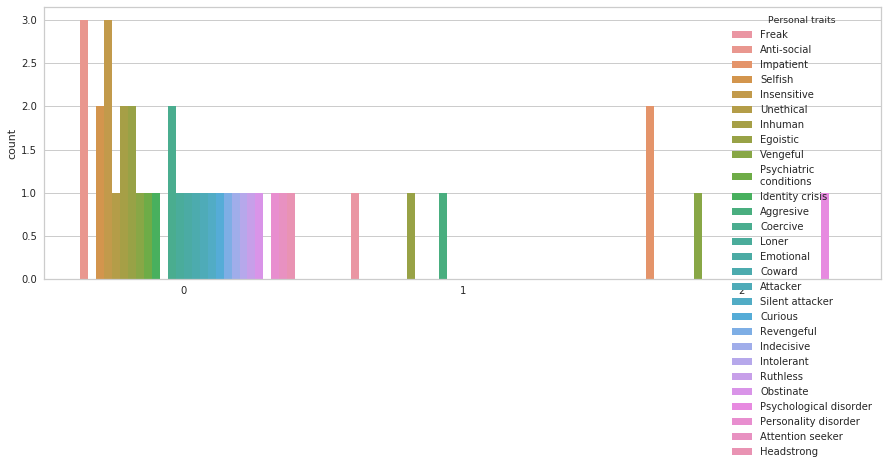

<Figure size 576x396 with 0 Axes>

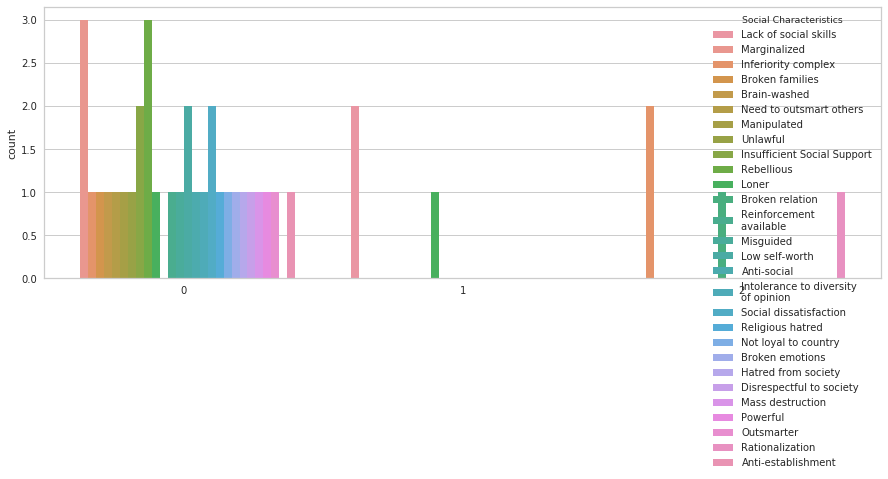

<Figure size 576x396 with 0 Axes>

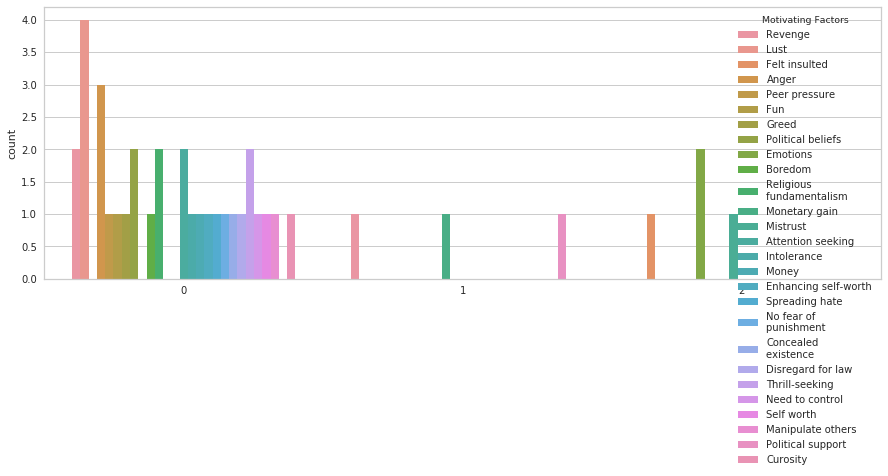

<Figure size 576x396 with 0 Axes>

In [7]:

for col in df:
    plt.subplots(figsize = (15,5))
    sns.countplot(cluster_labels,hue=col, data = df)
    plt.show()
    plt.savefig("Kmodesvisualize")